### [Disclaimer] Attention this notebook could be brouillion, you enter at your own risk!

In [4]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
import pandas as pd

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#handle str lib
import re

import matplotlib.pyplot as plt

from functions.happyness_helpers import *

pd.set_option('max_colwidth', 500)

#The data
advBeer_root = 'DATA/BeerAdvocate/'
rateBeer_root = 'DATA/RateBeer/'
df_adv_users = pd.read_csv(advBeer_root + 'users.csv')
df_rate_users = pd.read_csv(rateBeer_root + 'users.csv')

C:\Users\xavie\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\xavie\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\xavie\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\xavie\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\xavie\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if

In [ ]:
# the lines below all to separate the reviews.txt in separate csv for workings with light dataframe

#from functions import read_data
#mysmallreview = read_data.fetch_reviews(rateBeer_root +'RateBeer.tar.gz', max_csv_size = 250000,early_stop = 0)

## Setting positive and analyse words analysis

In [21]:
# code took from homework 1 
import requests
import re

positive_word_document = requests.get("https://ptrckprry.com/course/ssd/data/positive-words.txt")
negative_word_document = requests.get("https://ptrckprry.com/course/ssd/data/negative-words.txt")

positive_words = re.search(r'(?<=;[\r\n]{2}).*',positive_word_document.text,re.DOTALL).group(0).split()
negative_words = re.search(r'(?<=;[\r\n]{2}).*',negative_word_document.text,re.DOTALL).group(0).split()

#dictionary of sentiment words
sentiment_dict = {
    "positive" : positive_words,
    "negative" : negative_words
}

# Data analysis Starting ...

### Automatic loop for Rate beer by sub csv

In [82]:
# automatic loop for Rate beer (disclaimer this cell can take multiple hours to run)

csv_count = 0

#loop over all sub .csv dataset (each dataset have max 250 000 rows)
for csv_count in range(2,29):
    print('csv part:',csv_count)
    df_rev_low = pd.read_csv(rateBeer_root + 'RateBeer_reviews_part_' + str(csv_count) +'.csv')
    df_rev_low = df_rev_low[['beer_id', 'brewery_id', 'user_id', 'text']]
    list_user_location = df_rate_users.loc[df_rate_users['user_id'].isin(df_rev_low['user_id']),['user_id','location']]
    print('shape:',df_rev_low.shape, 'list user location shape', list_user_location.shape)
    
    df_rev_low.loc[:,'location'] = df_rev_low['user_id'].apply(get_location_user, args= (list_user_location,))
    
    df_rev_low.to_csv(rateBeer_root + 'RateBeer_location_user_id_part_' + str(csv_count) +'.csv')
    
    print('location done for part:', csv_count)
    
    #group by country
    country_groups = df_rev_low.groupby(by="location")
    
    # Positive, Negatifs words analysis
    data = []

    # loop for to compute the number of pos and neg words for each country
    for country, group in country_groups:
        negative_words = []
        positive_words = []
        print('country:', country, 'size:', group.shape[0])

        negative_words.append(group.apply(lambda row : indicator_words('negative',row['text'],sentiment_dict),axis=1))
        positive_words.append(group.apply(lambda row : indicator_words('positive',row['text'],sentiment_dict),axis=1))


        data.append([country,np.mean(negative_words),np.mean(positive_words), group.shape[0]])
        #resultats_pos_neg_words_2 = pd.DataFrame(data, columns=["country","neg_words", "pos_words", "nb_review"])


    resultats_pos_neg_words = pd.DataFrame(data, columns=["country","neg_words", "pos_words", "nb_review"])
    
    #save the data
    resultats_pos_neg_words.to_csv(rateBeer_root + 'RateBeer_pos_neg_words_analysis_part_' + str(csv_count) +'.csv', index=False)
    print('--------------------------------------------------------')

csv part: 2
shape: (250000, 4) list user location shape (9279, 2)
location done for part: 2
country: Afghanistan size: 1
country: Algeria size: 9
country: Andorra size: 5
country: Argentina size: 7
country: Ascension Island size: 4
country: Australia size: 2216
country: Austria size: 415
country: Belarus size: 160
country: Belgium size: 4609
country: Bermuda size: 65
country: Bolivia size: 8
country: Bosnia and Herzegovina size: 1
country: Botswana size: 2
country: Brazil size: 220
country: Bulgaria size: 8
country: Cambodia size: 32
country: Canada size: 7918
country: Chile size: 48
country: China size: 29
country: Colombia size: 12
country: Croatia size: 1450
country: Cuba size: 1
country: Cyprus size: 124
country: Czech Republic size: 521
country: Denmark size: 100052
country: Dominican Republic size: 18
country: Ecuador size: 2
country: El Salvador size: 35
country: England size: 7960
country: Estonia size: 2129
country: Faroe Islands size: 2039
country: Finland size: 9863
country:

country: United States, Illinois size: 2466
country: United States, Indiana size: 1505
country: United States, Iowa size: 574
country: United States, Kansas size: 333
country: United States, Kentucky size: 488
country: United States, Louisiana size: 171
country: United States, Maine size: 141
country: United States, Maryland size: 1010
country: United States, Massachusetts size: 705
country: United States, Michigan size: 1092
country: United States, Minnesota size: 1148
country: United States, Mississippi size: 76
country: United States, Missouri size: 806
country: United States, Montana size: 61
country: United States, Nebraska size: 302
country: United States, Nevada size: 360
country: United States, New Hampshire size: 332
country: United States, New Jersey size: 2036
country: United States, New Mexico size: 134
country: United States, New York size: 2004
country: United States, North Carolina size: 1099
country: United States, North Dakota size: 48
country: United States, Ohio size

country: Egypt size: 3
country: El Salvador size: 217
country: England size: 17722
country: Estonia size: 2990
country: Faroe Islands size: 451
country: Finland size: 7714
country: France size: 1942
country: Germany size: 39408
country: Greece size: 378
country: Greenland size: 3
country: Guam size: 9
country: Guatemala size: 8
country: Hong Kong size: 156
country: Hungary size: 976
country: Iceland size: 119
country: India size: 31
country: Indonesia size: 181
country: Ireland size: 355
country: Isle of Man size: 2
country: Israel size: 4583
country: Italy size: 2074
country: Japan size: 744
country: Jersey size: 10
country: Kazakhstan size: 10
country: Kosovo size: 1
country: Laos size: 2
country: Latvia size: 235
country: Lesotho size: 1
country: Liechtenstein size: 4
country: Lithuania size: 110
country: Luxembourg size: 93
country: Malaysia size: 319
country: Malta size: 3
country: Marshall Islands size: 74
country: Mexico size: 292
country: Moldova size: 554
country: Montserrat s

country: United States, Kentucky size: 314
country: United States, Louisiana size: 123
country: United States, Maine size: 95
country: United States, Maryland size: 724
country: United States, Massachusetts size: 478
country: United States, Michigan size: 570
country: United States, Minnesota size: 967
country: United States, Mississippi size: 20
country: United States, Missouri size: 801
country: United States, Montana size: 38
country: United States, Nebraska size: 225
country: United States, Nevada size: 367
country: United States, New Hampshire size: 236
country: United States, New Jersey size: 1154
country: United States, New Mexico size: 140
country: United States, New York size: 1473
country: United States, North Carolina size: 1112
country: United States, North Dakota size: 32
country: United States, Ohio size: 1189
country: United States, Oklahoma size: 133
country: United States, Oregon size: 482
country: United States, Pennsylvania size: 1439
country: United States, Rhode Is

country: Greenland size: 7
country: Guatemala size: 20
country: Honduras size: 1
country: Hong Kong size: 103
country: Hungary size: 493
country: Iceland size: 77
country: India size: 10
country: Indonesia size: 6
country: Ireland size: 89
country: Israel size: 1202
country: Italy size: 1140
country: Japan size: 297
country: Kazakhstan size: 1
country: Kenya size: 1
country: Laos size: 2
country: Latvia size: 1419
country: Lithuania size: 122
country: Luxembourg size: 72
country: Macedonia size: 17
country: Malaysia size: 310
country: Marshall Islands size: 15
country: Mexico size: 148
country: Moldova size: 243
country: Montenegro size: 2
country: Montserrat size: 2
country: Mozambique size: 12
country: Netherlands size: 9297
country: New Zealand size: 220
country: Nicaragua size: 3
country: Norfolk Island size: 1
country: North Korea size: 3
country: Northern Ireland size: 53
country: Norway size: 15397
country: Pakistan size: 1
country: Panama size: 12
country: Peru size: 113
countr

country: United States, Oklahoma size: 175
country: United States, Oregon size: 459
country: United States, Pennsylvania size: 1658
country: United States, Rhode Island size: 38
country: United States, South Carolina size: 150
country: United States, South Dakota size: 32
country: United States, Tennessee size: 402
country: United States, Texas size: 1187
country: United States, Utah size: 56
country: United States, Vermont size: 62
country: United States, Virginia size: 737
country: United States, Washington size: 1118
country: United States, West Virginia size: 61
country: United States, Wisconsin size: 895
country: United States, Wyoming size: 31
country: Uruguay size: 1
country: Venezuela size: 88
country: Wales size: 23
country: nan size: 1
--------------------------------------------------------
csv part: 10
shape: (250000, 4) list user location shape (14788, 2)
location done for part: 10
country: Afghanistan size: 1
country: American Samoa size: 1
country: Andorra size: 2
countr

country: United States, California size: 38497
country: United States, Colorado size: 5093
country: United States, Connecticut size: 1071
country: United States, Delaware size: 754
country: United States, Florida size: 10527
country: United States, Georgia size: 14030
country: United States, Hawaii size: 162
country: United States, Idaho size: 1878
country: United States, Illinois size: 7074
country: United States, Indiana size: 2843
country: United States, Iowa size: 1398
country: United States, Kansas size: 967
country: United States, Kentucky size: 1574
country: United States, Louisiana size: 1579
country: United States, Maine size: 346
country: United States, Maryland size: 4474
country: United States, Massachusetts size: 2031
country: United States, Michigan size: 3390
country: United States, Minnesota size: 4249
country: United States, Mississippi size: 356
country: United States, Missouri size: 2179
country: United States, Montana size: 237
country: United States, Nebraska size:

country: Norfolk Island size: 1
country: North Korea size: 11
country: Northern Ireland size: 33
country: Norway size: 2063
country: Pakistan size: 1
country: Panama size: 6
country: Philippines size: 222
country: Poland size: 537
country: Portugal size: 64
country: Puerto Rico size: 5
country: Romania size: 54
country: Russia size: 16
country: Saint Helena size: 1
country: Scotland size: 744
country: Serbia size: 19
country: Singapore size: 22
country: Slovak Republic size: 48
country: Slovenia size: 20
country: South Africa size: 12
country: South Korea size: 17
country: Spain size: 456
country: Sweden size: 5273
country: Switzerland size: 336
country: Taiwan size: 53
country: Thailand size: 98
country: Turkey size: 63
country: United States, Alabama size: 1308
country: United States, Alaska size: 530
country: United States, Arizona size: 4482
country: United States, Arkansas size: 193
country: United States, California size: 39133
country: United States, Colorado size: 5443
country:

country: Canada size: 10351
country: Chile size: 13
country: China size: 20
country: Colombia size: 2
country: Costa Rica size: 1
country: Croatia size: 104
country: Cyprus size: 68
country: Czech Republic size: 115
country: Denmark size: 7377
country: Dominican Republic size: 9
country: Ecuador size: 2
country: El Salvador size: 76
country: England size: 3983
country: Estonia size: 184
country: Faroe Islands size: 106
country: Finland size: 2335
country: France size: 140
country: Germany size: 1056
country: Greece size: 191
country: Guam size: 49
country: Guatemala size: 2
country: Hong Kong size: 40
country: Hungary size: 174
country: Iceland size: 54
country: India size: 5
country: Indonesia size: 6
country: Ireland size: 262
country: Isle of Man size: 6
country: Israel size: 619
country: Italy size: 479
country: Japan size: 670
country: Jersey size: 1
country: Kenya size: 1
country: Latvia size: 50
country: Lebanon size: 1
country: Lithuania size: 3
country: Luxembourg size: 20
cou

country: United States, Oregon size: 1772
country: United States, Pennsylvania size: 48942
country: United States, Rhode Island size: 222
country: United States, South Carolina size: 791
country: United States, South Dakota size: 20
country: United States, Tennessee size: 2754
country: United States, Texas size: 5785
country: United States, Utah size: 353
country: United States, Vermont size: 660
country: United States, Virginia size: 8285
country: United States, Washington size: 7571
country: United States, West Virginia size: 595
country: United States, Wisconsin size: 3551
country: United States, Wyoming size: 84
country: Venezuela size: 15
country: Virgin Islands (U.S.) size: 1
country: Wales size: 11
--------------------------------------------------------
csv part: 17
shape: (250000, 4) list user location shape (14458, 2)
location done for part: 17
country: Abkhazia size: 1
country: Argentina size: 12
country: Ascension Island size: 10
country: Australia size: 466
country: Austri

country: United States, Georgia size: 5833
country: United States, Hawaii size: 55
country: United States, Idaho size: 1588
country: United States, Illinois size: 8045
country: United States, Indiana size: 3858
country: United States, Iowa size: 5416
country: United States, Kansas size: 1291
country: United States, Kentucky size: 4280
country: United States, Louisiana size: 228
country: United States, Maine size: 601
country: United States, Maryland size: 5132
country: United States, Massachusetts size: 3653
country: United States, Michigan size: 4170
country: United States, Minnesota size: 27412
country: United States, Mississippi size: 91
country: United States, Missouri size: 2199
country: United States, Montana size: 200
country: United States, Nebraska size: 2782
country: United States, Nevada size: 784
country: United States, New Hampshire size: 4683
country: United States, New Jersey size: 8905
country: United States, New Mexico size: 168
country: United States, New York size: 7

country: Portugal size: 93
country: Romania size: 64
country: Russia size: 9
country: Scotland size: 698
country: Serbia size: 22
country: Singapore size: 8
country: Slovak Republic size: 129
country: Slovenia size: 43
country: South Africa size: 20
country: South Korea size: 14
country: Spain size: 600
country: Sweden size: 3174
country: Switzerland size: 228
country: Taiwan size: 26
country: Thailand size: 120
country: Turkey size: 95
country: Ukraine size: 19
country: United States, Alabama size: 1273
country: United States, Alaska size: 565
country: United States, Arizona size: 3098
country: United States, Arkansas size: 345
country: United States, California size: 15390
country: United States, Colorado size: 5610
country: United States, Connecticut size: 849
country: United States, Delaware size: 392
country: United States, Florida size: 5952
country: United States, Georgia size: 3549
country: United States, Hawaii size: 62
country: United States, Idaho size: 4659
country: United 

country: Cyprus size: 121
country: Czech Republic size: 538
country: Denmark size: 15984
country: Dominican Republic size: 4
country: Ecuador size: 4
country: El Salvador size: 99
country: England size: 36022
country: Estonia size: 1315
country: Faroe Islands size: 170
country: Finland size: 6704
country: France size: 816
country: Germany size: 3369
country: Greece size: 154
country: Greenland size: 1
country: Guam size: 17
country: Hong Kong size: 131
country: Hungary size: 337
country: Iceland size: 59
country: India size: 28
country: Indonesia size: 10
country: Ireland size: 777
country: Isle of Man size: 1
country: Israel size: 711
country: Italy size: 1718
country: Jamaica size: 1
country: Japan size: 720
country: Jersey size: 12
country: Jordan size: 2
country: Latvia size: 103
country: Lebanon size: 12
country: Lithuania size: 42
country: Luxembourg size: 284
country: Malaysia size: 306
country: Marshall Islands size: 3
country: Mexico size: 386
country: Moldova size: 121
countr

country: United States, New Jersey size: 820
country: United States, New Mexico size: 58
country: United States, New York size: 1016
country: United States, North Carolina size: 888
country: United States, North Dakota size: 23
country: United States, Ohio size: 831
country: United States, Oklahoma size: 102
country: United States, Oregon size: 478
country: United States, Pennsylvania size: 1222
country: United States, Rhode Island size: 18
country: United States, South Carolina size: 116
country: United States, South Dakota size: 9
country: United States, Tennessee size: 360
country: United States, Texas size: 1273
country: United States, Utah size: 134
country: United States, Vermont size: 74
country: United States, Virginia size: 778
country: United States, Washington size: 956
country: United States, West Virginia size: 40
country: United States, Wisconsin size: 576
country: United States, Wyoming size: 27
country: Venezuela size: 48
country: Wales size: 266
country: nan size: 1
--

country: Portugal size: 525
country: Puerto Rico size: 11
country: Romania size: 176
country: Russia size: 200
country: Saint Helena size: 4
country: Saudi Arabia size: 1
country: Scotland size: 6970
country: Serbia size: 170
country: Singapore size: 54
country: Slovak Republic size: 875
country: Slovakia size: 2
country: Slovenia size: 294
country: South Africa size: 150
country: South Korea size: 174
country: Spain size: 2495
country: Sweden size: 10679
country: Switzerland size: 1143
country: Taiwan size: 81
country: Thailand size: 631
country: Turkey size: 90
country: Uganda size: 1
country: Ukraine size: 100
country: United States, Alabama size: 636
country: United States, Alaska size: 383
country: United States, Arizona size: 1118
country: United States, Arkansas size: 242
country: United States, California size: 6333
country: United States, Colorado size: 1847
country: United States, Connecticut size: 526
country: United States, Delaware size: 231
country: United States, Florida

shape: (250000, 4) list user location shape (15264, 2)
location done for part: 27
country: Algeria size: 2
country: Andorra size: 19
country: Argentina size: 23
country: Ascension Island size: 17
country: Australia size: 3511
country: Austria size: 333
country: Bahamas size: 6
country: Bangladesh size: 1
country: Belarus size: 207
country: Belgium size: 23225
country: Bermuda size: 365
country: Bolivia size: 32
country: Bosnia and Herzegovina size: 2
country: Botswana size: 1
country: Brazil size: 1022
country: Bulgaria size: 15
country: Cambodia size: 65
country: Canada size: 14828
country: Chile size: 175
country: China size: 83
country: Colombia size: 18
country: Costa Rica size: 5
country: Croatia size: 1079
country: Cyprus size: 176
country: Czech Republic size: 695
country: Denmark size: 21684
country: Dominican Republic size: 451
country: Ecuador size: 10
country: El Salvador size: 95
country: England size: 12121
country: Estonia size: 1808
country: Faroe Islands size: 352
count

country: United States, Colorado size: 502
country: United States, Connecticut size: 147
country: United States, Delaware size: 48
country: United States, Florida size: 803
country: United States, Georgia size: 278
country: United States, Hawaii size: 19
country: United States, Idaho size: 166
country: United States, Illinois size: 772
country: United States, Indiana size: 422
country: United States, Iowa size: 198
country: United States, Kansas size: 100
country: United States, Kentucky size: 161
country: United States, Louisiana size: 59
country: United States, Maine size: 49
country: United States, Maryland size: 466
country: United States, Massachusetts size: 306
country: United States, Michigan size: 314
country: United States, Minnesota size: 466
country: United States, Mississippi size: 18
country: United States, Missouri size: 199
country: United States, Montana size: 15
country: United States, Nebraska size: 87
country: United States, Nevada size: 170
country: United States, N

In [24]:
# group by country with all dataframe concated
df_all_rb =  ratebeer_merging_csv_results()
country_res_groups_all_rb = df_all_rb.groupby(by='country').apply(weighted_average_all, 'pos_words','neg_words','nb_review')
df_final_rb = pd.DataFrame(country_res_groups_all_rb.tolist(), columns=[['neg_words','pos_words','nb_review']])
df_final_rb['location'] = country_res_groups_all_rb.index

# save the results ratebeer resume
df_final_rb.to_csv(rateBeer_root + 'RateBeer_pos_neg_analysis_resume.csv',index=False)

df_final_rb.shape

(218, 4)

### Automatic loop for all Adv beer by sub csv

In [65]:
# automatic loop for advocate beer csv postiive and negative words analysis
# (disclaimer this cell can take multiple hours to run)

csv_count = 0

#loop over all sub .csv dataset (each dataset have max 250 000 rows)
for csv_count in range(0,11):
    print('csv part:',csv_count)
    df_rev_low = pd.read_csv(advBeer_root + 'BeerAdvocate_reviews_part_' + str(csv_count) +'.csv')
    df_rev_low = df_rev_low[['beer_id', 'brewery_id', 'user_id', 'text']]
    list_user_location_adv = df_adv_users.loc[df_adv_users['user_id'].isin(df_rev_low['user_id']),['user_id','location']]
    print('shape:',df_rev_low.shape, 'list user location adv shape', list_user_location_adv.shape)
    
    df_rev_low.loc[:,'location'] = df_rev_low['user_id'].apply(get_location_user, args= (list_user_location_adv,))
    
    df_rev_low.to_csv(advBeer_root + 'BeerAdvocate_location_user_id_part_' + str(csv_count) +'.csv')
    
    print('location done for part:', csv_count)
    
    #group by country
    country_groups = df_rev_low.groupby(by="location")
    
    # Positive, Negatifs words analysis
    data = []

    # loop for to compute the number of pos and neg words for each country
    for country, group in country_groups:
        negative_words = []
        positive_words = []
        print('country:', country, 'size:', group.shape[0])

        negative_words.append(group.apply(lambda row : indicator_words('negative',row['text'],sentiment_dict),axis=1))
        positive_words.append(group.apply(lambda row : indicator_words('positive',row['text'],sentiment_dict),axis=1))


        data.append([country,np.mean(negative_words),np.mean(positive_words), group.shape[0]])
        #resultats_pos_neg_words_2 = pd.DataFrame(data, columns=["country","neg_words", "pos_words", "nb_review"])


    resultats_pos_neg_words = pd.DataFrame(data, columns=["country","neg_words", "pos_words", "nb_review"])
    
    #save the data
    resultats_pos_neg_words.to_csv(advBeer_root + 'BeerAdvocate_pos_neg_words_analysis_part_' + str(csv_count) +'.csv')
    print('--------------------------------------------------------')
    
    

csv part: 6
shape: (250000, 4) review shape (21801, 2)
location done for part: 6
country: Antarctica size: 4
country: Aotearoa size: 2
country: Australia size: 221
country: Austria size: 33
country: Bahamas size: 19
country: Belgium size: 53
country: Bolivia size: 5
country: Bouvet Island size: 1
country: Brazil size: 43
country: Burkina Faso size: 3
country: Cambodia size: 1
country: Canada size: 4044
country: Chile size: 1
country: China size: 34
country: Costa Rica size: 2
country: Croatia size: 22
country: Czech Republic size: 1
country: Denmark size: 19
country: Dominican Republic size: 1
country: England size: 255
country: Faroe Islands size: 2
country: Fiji Islands size: 4
country: Finland size: 8
country: France size: 61
country: Germany size: 465
country: Greece size: 1
country: Guam size: 1
country: Hong Kong size: 12
country: Hungary size: 1
country: India size: 3
country: Ireland size: 21
country: Isle of Man size: 3
country: Italy size: 7
country: Japan size: 50
country: J

KeyboardInterrupt: 

In [20]:
# group by country with all dataframe  concated
df_all_adv =  advbeer_merging_csv_results()
country_res_groups_all_adv = df_all_adv.groupby(by='country').apply(weighted_average_all, 'pos_words','neg_words','nb_review')
df_final_adv = pd.DataFrame(country_res_groups_all_adv.tolist(), columns=[['neg_words','pos_words','nb_review']])
df_final_adv['location'] = country_res_groups_all_adv.index

# save the advocate beer resutls
df_final_adv.to_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv',index=False)

df_final_adv.shape

(173, 4)

# Analysis Results AdvBeer and RateBeer

In [10]:
df_final_adv = pd.read_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv')
df_final_rate = pd.read_csv(rateBeer_root + 'RateBeer_pos_neg_analysis_resume.csv')

In [11]:
df_final_adv.head(n= 60)

,neg_words,pos_words,nb_review,location
0,6.000000,11.000000,2,Afghanistan
1,3.222222,6.055556,18,American Samoa
2,2.000000,4.600000,5,Andorra
3,4.000000,5.000000,1,Anguilla
4,2.685185,5.296296,108,Antarctica
5,4.333333,12.666667,3,Antigua and Barbuda
6,3.220588,5.639706,272,Aotearoa
7,2.772358,6.008130,123,Argentina
8,2.000000,4.000000,2,Aruba
9,3.812929,7.367358,24766,Australia


In [7]:
df_final_adv.columns.to_list()

['neg_words', 'pos_words', 'nb_review', 'location']

In [8]:
df_final_adv = pd.read_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv')
df_final_adv = df_final_adv.loc[df_final_adv['nb_review'] > 1000, :]
df_us = df_final_adv.loc[df_final_adv['location'].str.contains('United States'),:]
df_final_adv = df_final_adv.loc[~df_final_adv['location'].str.contains('United States'),:]
us = weighted_average_all(df_us,'pos_words','neg_words','nb_review')
df_us = pd.DataFrame(columns=[['neg_words','pos_words','nb_review','location']])
df_us.loc[0,'neg_words'] = us[0]
df_us.loc[0,'pos_words'] = us[1]
df_us.loc[0,'nb_review'] = us[2]
df_us.loc[0,'location'] = 'United State'
#df_all = pd.concat([df_final_adv, df_us],axis=0, ignore_index=True)
df_all = df_final_adv.append(df_us)
df_us.head()

,neg_words,pos_words,nb_review,location
0,3.315504,7.290309,2009651,United State


In [9]:
df_all.head(n=-5)

,"(location,)","(nb_review,)","(neg_words,)","(pos_words,)",location,nb_review,neg_words,pos_words
9,NaN,NaN,NaN,NaN,Australia,24766.0,3.812929,7.367358
14,NaN,NaN,NaN,NaN,Belgium,3987.0,2.775019,5.930023
26,NaN,NaN,NaN,NaN,Canada,121525.0,3.646731,7.282551
39,NaN,NaN,NaN,NaN,England,20430.0,3.588350,6.430837
44,NaN,NaN,NaN,NaN,France,3523.0,2.277604,4.341754
45,NaN,NaN,NaN,NaN,Germany,7832.0,2.976762,6.805797
57,NaN,NaN,NaN,NaN,Ireland,1174.0,2.562181,6.454003
60,NaN,NaN,NaN,NaN,Italy,2965.0,2.251939,4.132209
61,NaN,NaN,NaN,NaN,Japan,2535.0,3.054438,6.295069
75,NaN,NaN,NaN,NaN,Mexico,3528.0,2.632086,5.878118


In [74]:
df_us.head()

,neg_words,pos_words,nb_review,location
0,3.315504,7.290309,2009651,United State


In [79]:
df_final_adv.head(n=30)

,neg_words,pos_words,nb_review,location
9,3.812929,7.367358,24766,Australia
14,2.775019,5.930023,3987,Belgium
26,3.646731,7.282551,121525,Canada
39,3.588350,6.430837,20430,England
44,2.277604,4.341754,3523,France
45,2.976762,6.805797,7832,Germany
57,2.562181,6.454003,1174,Ireland
60,2.251939,4.132209,2965,Italy
61,3.054438,6.295069,2535,Japan
75,2.632086,5.878118,3528,Mexico


In [1]:
df_final_adv.sort_values(by = 'pos_words',  ascending=True).head(n= 25)

NameError: name 'df_final_adv' is not defined

In [21]:
df_final_adv.sort_values(by = 'neg_words',  ascending=False).head(n= 25)

,neg_words,pos_words,nb_review,location
105,4.351809,6.147960,8678,Sweden
131,4.263345,8.418305,19689,"United States, Iowa"
143,4.027885,8.465847,8535,"United States, Nebraska"
138,3.843178,8.965422,59488,"United States, Michigan"
9,3.812929,7.367358,24766,Australia
77,3.749363,7.383602,9416,Netherlands
133,3.685279,7.573058,31037,"United States, Kentucky"
166,3.661116,7.475022,3423,"United States, Wyoming"
26,3.646731,7.282551,121525,Canada
81,3.613327,8.544747,2056,Northern Ireland


## Positive and negatifs words analysis on 100k data

In [3]:
books = list()

for book_file in os.listdir(advBeer_root):
    if "reviews.txt" in book_file:
        if not "gz"in book_file:
            print(book_file)
            with codecs.open(os.path.join(advBeer_root,book_file),encoding="utf8") as f:
                books.append(f.read())

reviews.txt


In [4]:
print(books[0][:600])

beer_name: Régab
beer_id: 142544
brewery_name: Societe des Brasseries du Gabon (SOBRAGA)
brewery_id: 37262
style: Euro Pale Lager
abv: 4.5
date: 1440064800
user_name: nmann08
user_id: nmann08.184925
appearance: 3.25
aroma: 2.75
palate: 3.25
taste: 2.75
overall: 3.0
rating: 2.88
text: From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, c


In [15]:
data = []
with open(advBeer_root +'reviews.txt', encoding='utf-8') as f:
    for line in f.readlines():
        line = line[:-1]
        
        if line.startswith('beer_id'):
            beer_id = line[8:]
            continue
            
        if line.startswith('user_id'):
            user_id = line[8:]
            continue
            
        if line.startswith('text'):
            review = line[6:]
            data.append([beer_id, user_id,review])
            continue
       
        
df_reviews_adv = pd.DataFrame(data, columns=["beer_id", "user_id", "review"])
df_reviews_adv_low = df_reviews_adv.iloc[:100000, :]
print(df_reviews_adv_low.shape)


(100000, 3)


In [19]:
list_user_location_adv = df_adv_users.loc[df_adv_users['user_id'].isin(df_reviews_adv_low['user_id']),['user_id','location']]
df_reviews_adv_low.loc[:,'location'] = df_reviews_adv_low['user_id'].apply(get_location_user, args= (list_user_location_adv,))

In [11]:
# code took from homework 1 
# get the list of positive and negative words from the hw1

import requests
import re

positive_word_document = requests.get("https://ptrckprry.com/course/ssd/data/positive-words.txt")
negative_word_document = requests.get("https://ptrckprry.com/course/ssd/data/negative-words.txt")

positive_words = re.search(r'(?<=;[\r\n]{2}).*',positive_word_document.text,re.DOTALL).group(0).split()
negative_words = re.search(r'(?<=;[\r\n]{2}).*',negative_word_document.text,re.DOTALL).group(0).split()

#dictionary of sentiment words
sentiment_dict = {
    "positive" : positive_words,
    "negative" : negative_words
}

In [104]:
# loop for to check the presences of positifs or negatifs words
for country, group in country_groups:
    for key in sentiment_dict:
        a = group.apply(lambda row : indicator(key,row['review'],sentiment_dict),axis=1) 
        resultats.loc[resultats['country']==country,f"{key}"] = a.mean()
    
resultats.head(n=20)

country Benin
   positive words  negative words
0             2.0             2.0
country Burkina Faso
   positive words  negative words
1             2.0             3.0
country China
   positive words  negative words
2        5.940086        3.217546
country England
   positive words  negative words
3        6.867296        3.246689
country Gabon
   positive words  negative words
4             1.0             3.0
country Georgia
   positive words  negative words
5        5.567568        2.810811
country Hong Kong
   positive words  negative words
6        5.697674        3.581395
country Mexico
   positive words  negative words
7        5.755632        2.627326
country Montenegro
   positive words  negative words
8        6.567164        4.134328
country Nigeria
   positive words  negative words
9        5.608696        4.673913
country Northern Ireland
    positive words  negative words
10        5.970297        2.928218
country Romania
    positive words  negative words
11        5

,country,neg sentiment,pos sentiment,neu sentiment,nb of review,positive,negative,positive words,negative words
0,Benin,0.051000,0.064000,0.884000,1,1.000000,1.000000,2.000000,2.000000
1,Burkina Faso,0.066000,0.104000,0.830000,1,1.000000,1.000000,2.000000,3.000000
2,China,0.052725,0.129221,0.818043,1402,0.988588,0.917974,5.940086,3.217546
3,England,0.042839,0.153899,0.803262,69395,0.986498,0.917617,6.867296,3.246689
4,Gabon,0.139000,0.098000,0.763000,1,1.000000,1.000000,1.000000,3.000000
5,Georgia,0.037595,0.122784,0.839541,37,0.972973,0.891892,5.567568,2.810811
6,Hong Kong,0.049093,0.156674,0.794140,43,0.906977,0.883721,5.697674,3.581395
7,Mexico,0.045459,0.141436,0.813119,2042,0.980411,0.876592,5.755632,2.627326
8,Montenegro,0.055299,0.131478,0.813224,67,1.000000,0.940299,6.567164,4.134328
9,Nigeria,0.058109,0.134065,0.807826,46,1.000000,0.956522,5.608696,4.673913


#  Sentiments Analysis with nlp

Testing the sentiment analysis saw in course, to know if it could be interesting or not. 
The analysis shows that most of the reviews are rather neutral which is why we did not decide to make a more accurate analysis of the reviews' feelings. This neutral feeling is understandable as the users' reviews describe a lot the beer.

In [ ]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
nlp = spacy.load('en_core_web_sm')

In [ ]:
# try a simple example to check the code is okay
example = df_rev_low.review[0]
vs = analyzer.polarity_scores(example)
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

In [ ]:
# Positive, Negatids and neutral sentiment analysis by taking the mean of every review sentiment per country
data = []

# loop for to compute the mean for each country
for country, group in country_groups:
    negative_sent = []
    positive_sent = []
    neutre_sent=[]
    [negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in group.review]
    [positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in group.review]
    [neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in group.review]

    data.append([country,np.array(negative_sent).mean(),np.array(positive_sent).mean(), 
                 np.array(neutre_sent).mean(), group.shape[0]])
    print('country:', country, data[-1])
    

resultats_sentiments = pd.DataFrame(data, columns=["country","neg sentiment", "pos sentiment", "neu sentiment", "nb of review"])

In [ ]:
resultats_sentiments.head(n=18)

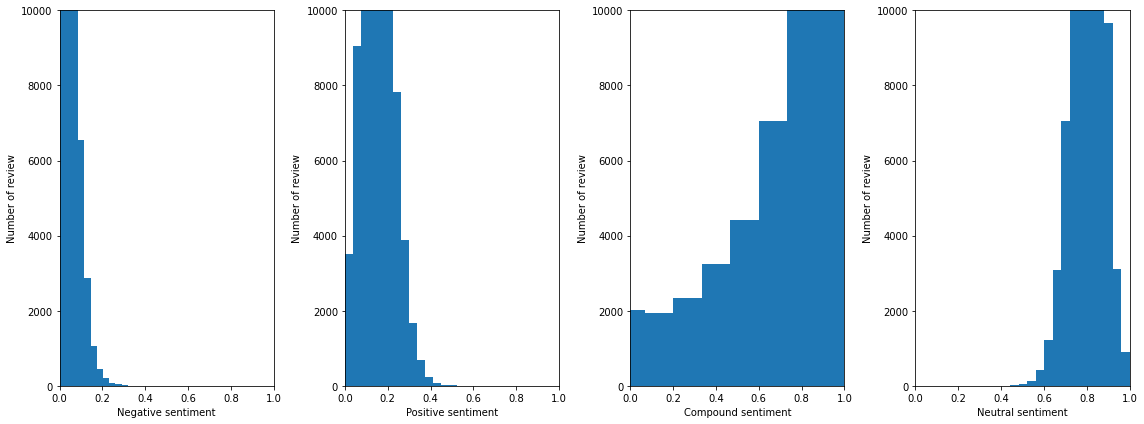

In [16]:
ROW = 10000
df_rev_low.shape

plt.close('all')
fig = plt.figure(figsize=(16,6))

ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_reviews_adv_low.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment', ylabel = 'Number of review') 

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_reviews_adv_low.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment', ylabel = 'Number of review') 

total_sent = []
[total_sent.append(analyzer.polarity_scores(sent)['compound']) for sent in df_reviews_adv_low.review]
ax3.hist(total_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Compound sentiment', ylabel = 'Number of review') 

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_reviews_adv_low.review]
ax4.hist(neutre_sent,bins=15)
ax4.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment', ylabel = 'Number of review') 

plt.tight_layout()

In [95]:
df_rev_low_sco = df_reviews_adv_low.loc[df_rev_low['location'] == 'Scotland',:]
df_rev_low_wal = df_reviews_adv_low.loc[df_rev_low['location'] == 'Wales',:]
df_rev_low_ir = df_reviews_adv_low.loc[df_rev_low['location'] == 'Northern Ireland',:]

[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Negative sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review gabon')]

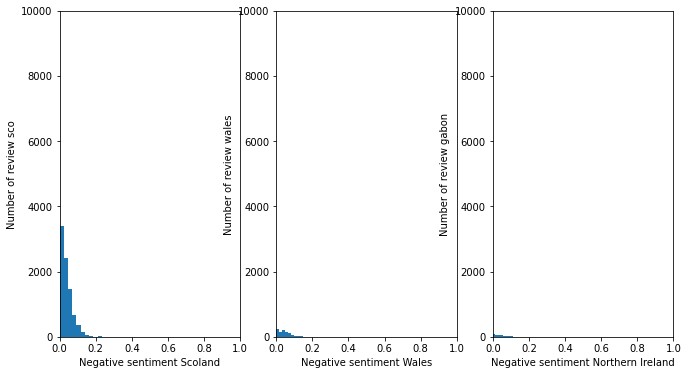

In [99]:
plt.close('all')
fig = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_sco.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Scoland', ylabel = 'Number of review sco') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_wal.review]
ax2.hist(negative_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Wales', ylabel = 'Number of review wales') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_ir.review]
ax3.hist(negative_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Northern Ireland', ylabel = 'Number of review gabon') 




[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Positive sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

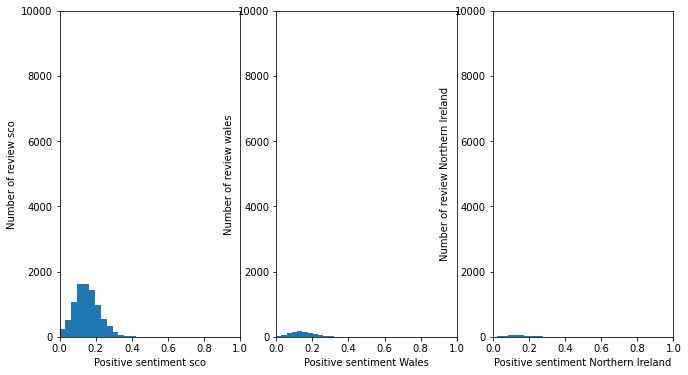

In [101]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_sco.review]
ax1.hist(positive_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment sco', ylabel = 'Number of review sco') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_wal.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment Wales', ylabel = 'Number of review wales') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_ir.review]
ax3.hist(positive_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 

[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Neutral sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

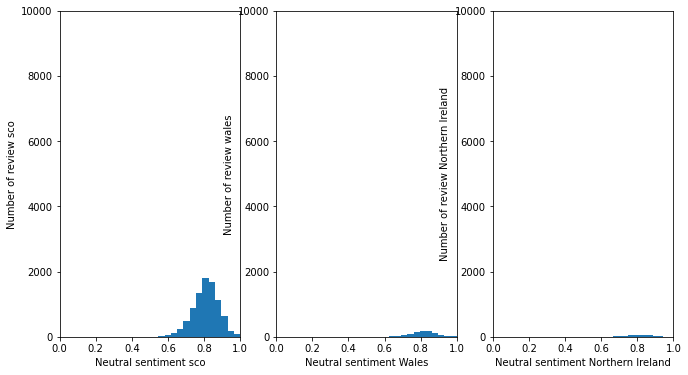

In [105]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_sco.review]
ax1.hist(neutre_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment sco', ylabel = 'Number of review sco') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_wal.review]
ax2.hist(neutre_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment Wales', ylabel = 'Number of review wales') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_ir.review]
ax3.hist(neutre_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 